In [1]:
from utils import *

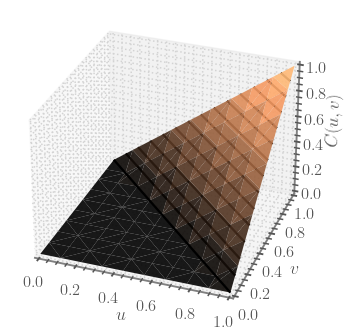

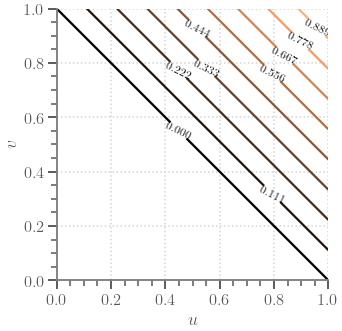

In [2]:
fig, ax = plot_copula_density(lambda u,v: np.maximum(u + v - 1, 0), levels=15)
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_zlabel("$C(u,v)$")
savefig('02_MinimumCopula_surface');

fig, ax = plot_copula_contour(lambda u,v: np.maximum(u + v - 1, 0))
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
savefig('02_MinimumCopula_contour');

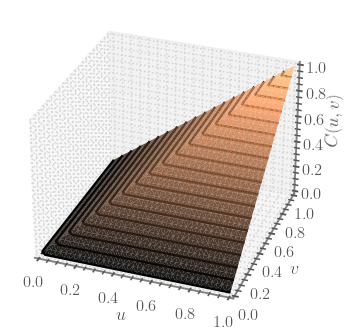

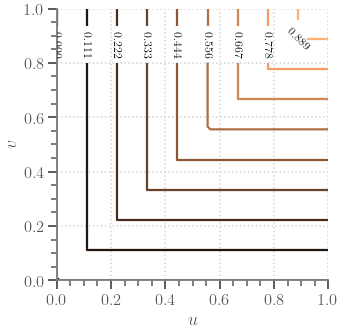

In [3]:
fig, ax = plot_copula_density(lambda u,v: np.minimum(u, v), levels=20, nx=40)
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_zlabel("$C(u,v)$")
savefig('02_MaximumCopula_surface');

fig, ax = plot_copula_contour(lambda u,v: np.minimum(u,v), nx=100)
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
savefig('02_MaximumCopula_contour');

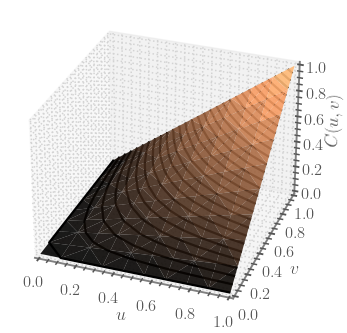

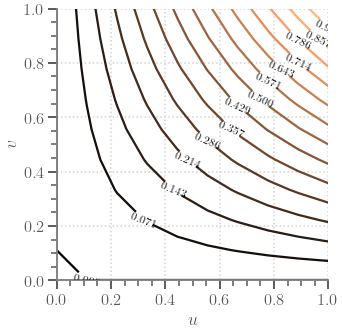

In [4]:
fig, ax = plot_copula_density(lambda u,v: u*v, levels=30)
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_zlabel("$C(u,v)$")
savefig('02_ProductCopula_surface');

fig, ax = plot_copula_contour(lambda u,v: u*v, levels=15, nx=10)
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
savefig('02_ProductCopula_contour');

D:\Classes\Mgr\Masters_Thesis\003_Code\Python\utils.py:91: UserWarning: No contour levels were found within the data range.
  ax.contour(u, v, z, colors='black', levels=np.linspace(0, zmax, levels))
D:\Classes\Mgr\Masters_Thesis\003_Code\Python\utils.py:114: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(u, v, z, cmap=cmap, levels=np.linspace(0.0, zmax, levels), **kwargs)


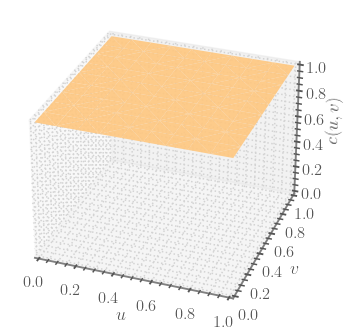

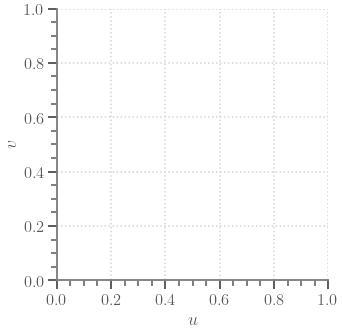

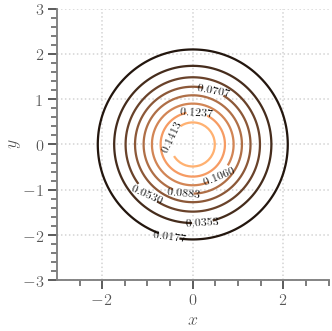

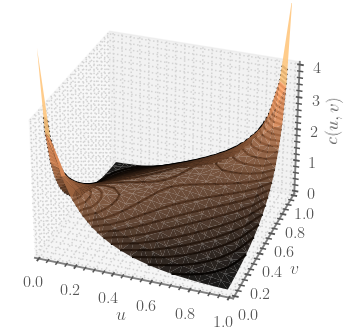

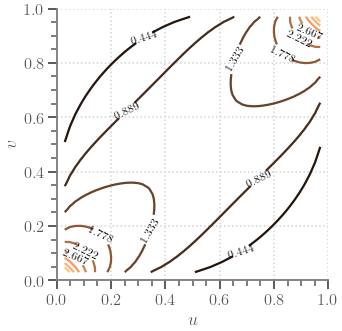

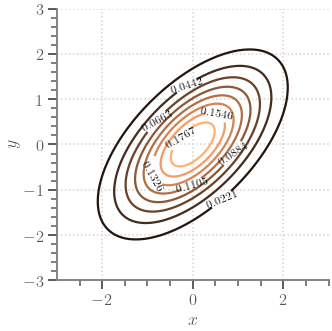

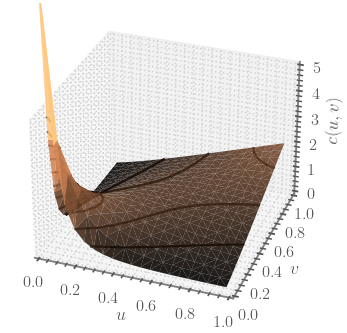

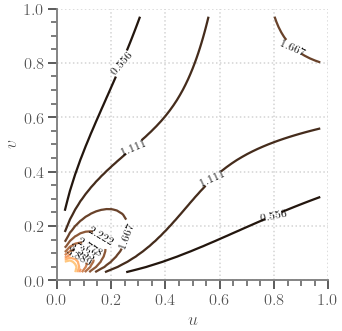

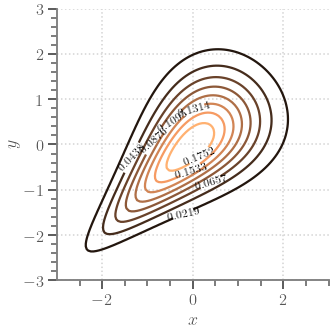

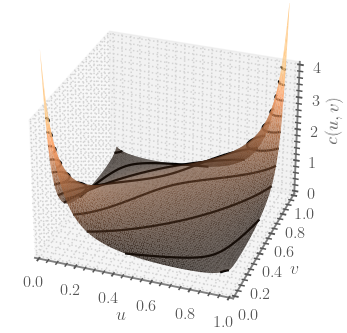

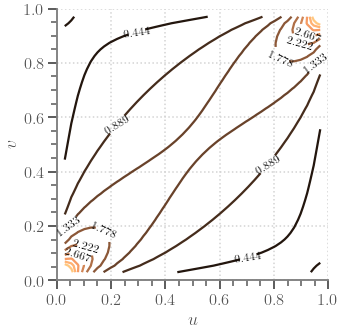

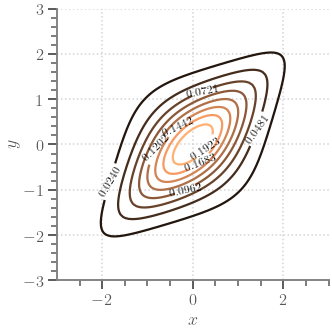

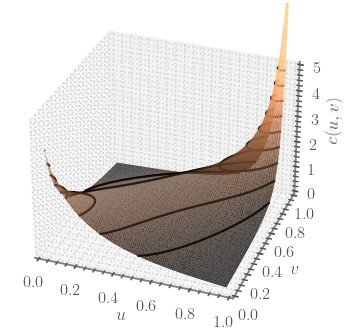

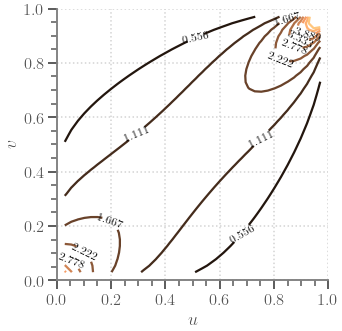

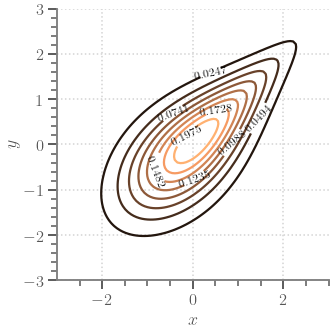

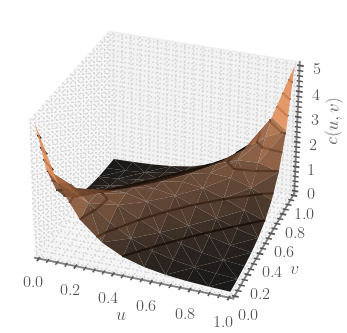

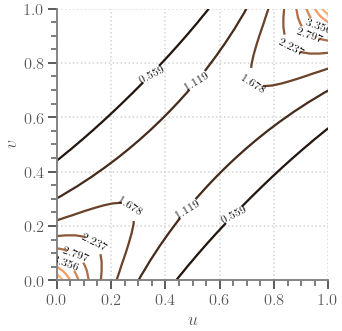

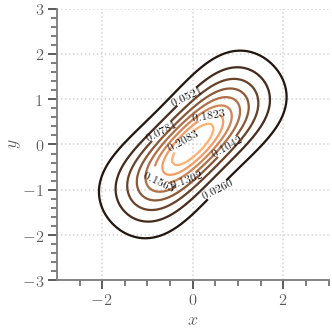

In [5]:
cops = {'Independence': {'copula': pv.Bicop(family = pv.indep, parameters=[]), 
                         'kw_surface': {},
                         'kw_contour': {}, 
                         'kw_contour_n': {}},
        'Gaussian': {"copula": pv.Bicop(family = pv.gaussian, parameters = [0.6]),
                     "kw_surface": {"eps":0.02, "nx":20, "zmax":4, "levels":30},
                     "kw_contour": {"levels": 10, "eps":0.03, "nx":50, "zmax": 4},
                     "kw_contour_n": {}},
        'Clayton': {"copula": pv.Bicop(family=pv.clayton, parameters=[1.2]),
                    "kw_surface": {"eps":0.03, "nx":20, "levels":10, "zmax":5},
                    "kw_contour": {"levels":10, "eps":0.03, "nx":50, "zmax":5},
                    "kw_contour_n": {"levels":10, "eps":0.03, "nx":50}},
        'Student': {"copula": pv.Bicop(family=pv.student, parameters=[0.5, 3]),
                    "kw_surface": {"eps":0.03, "zmax":4, "nx":100},
                    "kw_contour": {"eps":0.03, "zmax":4, "nx":40, "levels":10},
                    "kw_contour_n": {"levels":10}},
        'Gumbel': {"copula": pv.Bicop(family=pv.gumbel, parameters=[1.8]),
                   "kw_surface": {"eps":0.03, "zmax":5, "nx":100},
                   "kw_contour": {"eps":0.03, "zmax":5, "nx":40, "levels":10},
                   "kw_contour_n": {"levels":10}},
        'Frank': {"copula": pv.Bicop(family=pv.frank, parameters=[5]),
                  "kw_surface": {},
                  "kw_contour": {},
                  "kw_contour_n": {}}}

for name, params in cops.items():
    cop = params['copula']
    fig, ax = plot_copula_density(cop, **params['kw_surface'])
    ax.set_xlabel("$u$")
    ax.set_ylabel("$v$")
    ax.set_zlabel("$c(u,v)$")
    savefig(f'02_{name}Copula_density');
    
    fig, ax = plot_copula_contour(cop, **params['kw_contour'])
    ax.set_xlabel("$u$")
    ax.set_ylabel("$v$")
    savefig(f'02_{name}Copula_contour');
        
    fig, ax = plot_copula_contour(cop, normalize=True, **params['kw_contour_n'])
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    savefig(f'02_{name}Copula_contour_norm');

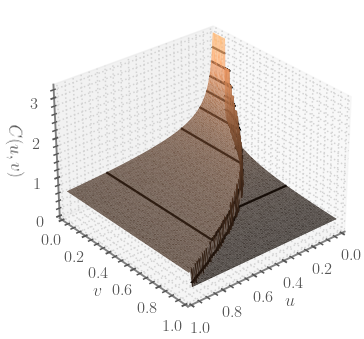

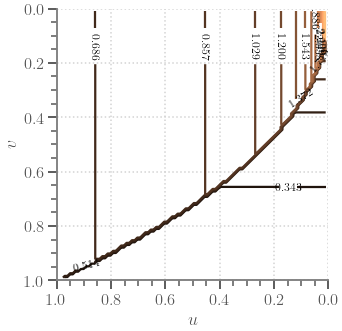

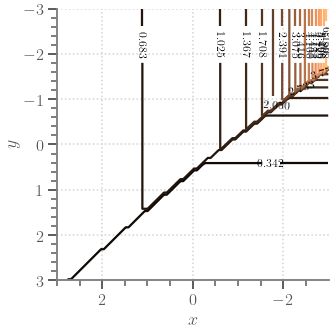

In [6]:
def marshall_olkin_density(u, v, m = 0.35, n=0.75):
    result = np.zeros_like(u)
    result[u**m > v**n] = (1-m)*u[u**m > v**n]**(-m)
    result[u**m < v**n] = (1-n)*v[u**m < v**n]**(-n)
    return result

cop = marshall_olkin_density
name="MarshallOlkin"
fig, ax = plot_copula_density(cop, eps = 0.01, nx=100, rot =(30, 50))
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_zlabel("$C(u,v)$")
savefig(f'02_{name}Copula_density');
    
fig, ax = plot_copula_contour(cop, eps = 0.01, levels=20, nx=100)
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.invert_yaxis()
ax.invert_xaxis()
savefig(f'02_{name}Copula_contour');
    
eps = 0.01
x = np.linspace(-3+eps, 3-eps, 100)
X, Y = np.meshgrid(x,x)
NX = norm.cdf(X)
NY = norm.cdf(Y)
zmax=None
cmap='copper'
levels = 20
fig, ax =plt.subplots()
z = np.reshape(marshall_olkin_density(NX, NY), X.shape)
zmax = np.max(z) if zmax is None else zmax
cset = ax.contour(X, Y, z, cmap=cmap, levels=np.linspace(0.0, zmax, levels))   
ax.clabel(cset, inline=True, colors='black', fontsize=12)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect('equal', 'box')
savefig(f'02_{name}Copula_contour_norm');